In [2]:
!python3 -m pip install pybaobabdt

In [2]:
import pybaobabdt
import pandas as pd
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier

In [3]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from colour import Color
import matplotlib.pyplot as plt
import numpy as np

data = arff.loadarff('vehicle.arff')
df   = pd.DataFrame(data[0])
y = list(df['class'])
features = list(df.columns)

                   
features.remove('class')
X = df.loc[:, features]

clf = DecisionTreeClassifier().fit(X, y)

<Figure size 720x720 with 0 Axes>

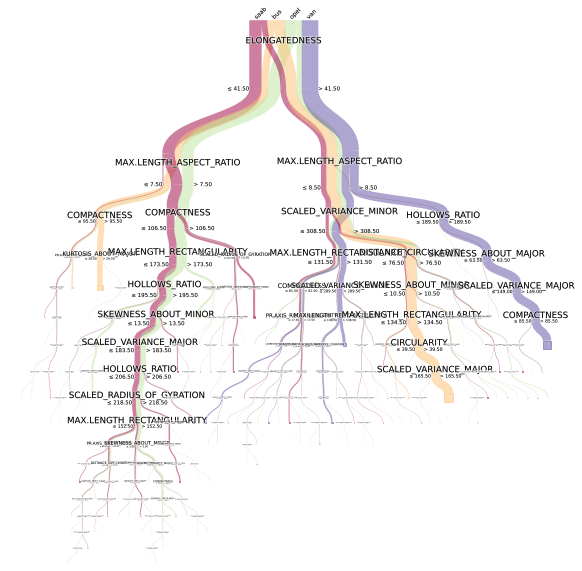

In [4]:
ax = pybaobabdt.drawTree(clf, size=10, dpi=72, features=features, colormap='Spectral')

In [6]:
ax.get_figure().savefig('tree_example.png', format='png', dpi=300, transparent=True)

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(
    clf,
    out_file='model.dot',
    feature_names=features,
    rounded=True,
    filled=False)

In [8]:
!dot -Tpng model.dot -o vehicle_dt.png

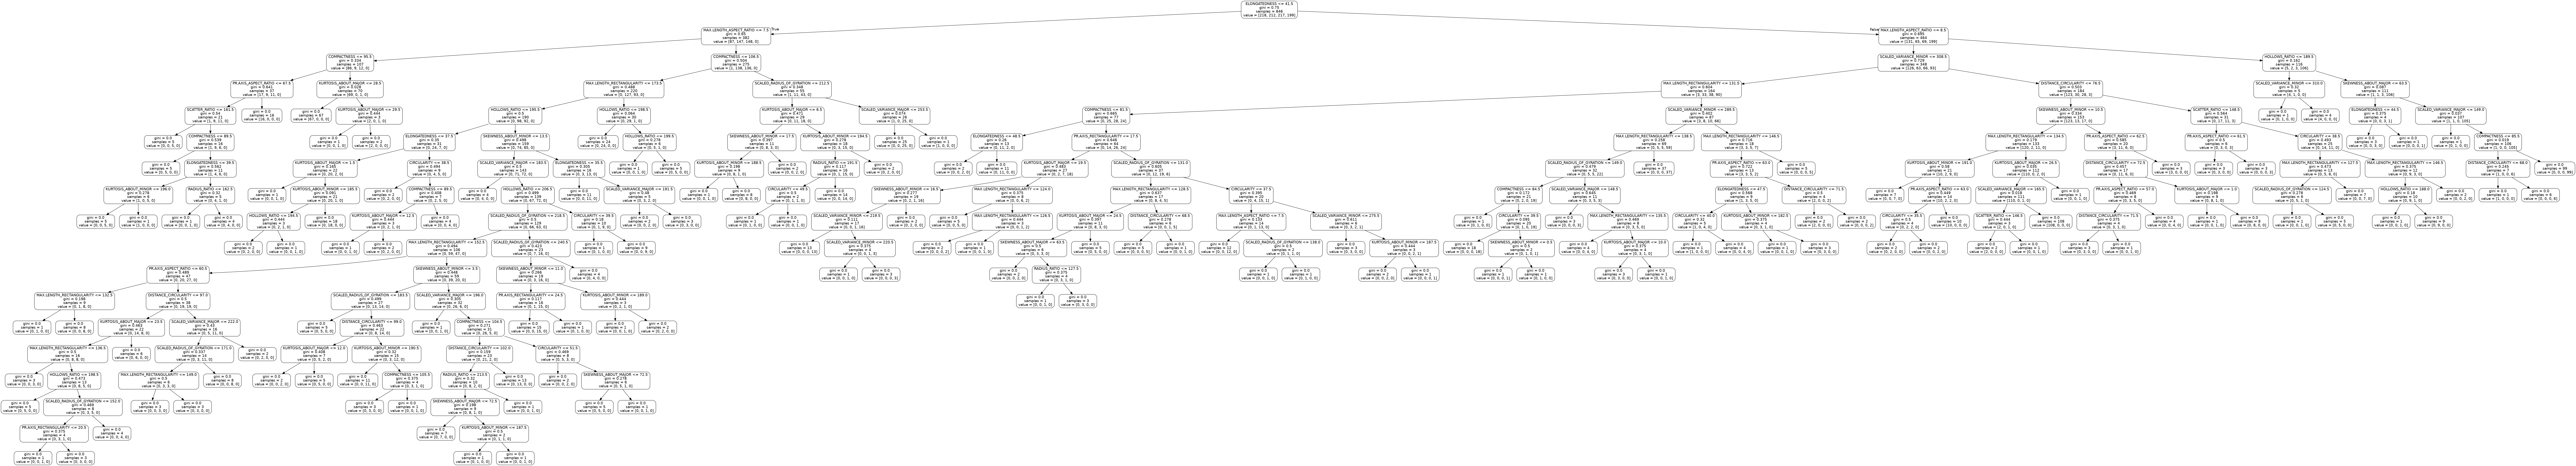

In [9]:
from IPython.display import Image
Image(filename='vehicle_dt.png')